In [57]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
from rdkit import RDLogger
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import itertools

lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [2]:
# how many cmpds are within rule of 3 for lead-likeness?
from rdkit.Chem import rdMolDescriptors
def check_lead_likeness(mol):
    MW = Descriptors.MolWt(mol)
    HBA = Descriptors.NumHAcceptors(mol)
    HBD = Descriptors.NumHDonors(mol)
    LogP = Descriptors.MolLogP(mol)
    Rot = rdMolDescriptors.CalcNumRotatableBonds(mol)
    conditions = [MW <= 300, HBA <= 3, HBD <= 3, LogP <= 3, Rot <= 3]
    if conditions.count(True)  >= 5:
        return True
    else:
        return False

In [4]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
data = [mol for mol in suppl if mol]
sum_lead_likeness = sum([check_lead_likeness(mol) for mol in data])
sum_lead_likeness

1037

In [5]:
sum_lead_likeness/len(data)

0.14564606741573033

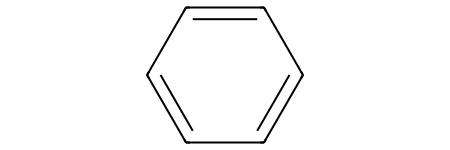

In [18]:
benzene = Chem.MolFromSmiles('c1ccccc1')
benzene

In [23]:
has_benzene = [mol for mol in data if mol.HasSubstructMatch(benzene)]

In [29]:
len(has_benzene)

4288

In [25]:
len(has_benzene)/len(data)

0.6022471910112359

60% of cmpds in drugbank contain benzene ring

In [30]:
# Find atom indices of benzene rings in cmpds
benzene_atoms = [mol.GetSubstructMatch(benzene) for mol in has_benzene]
benzene_atoms

[(21, 22, 23, 24, 25, 26),
 (74, 81, 87, 90, 88, 82),
 (44, 51, 49, 50, 52, 45),
 (0, 2, 4, 5, 3, 1),
 (44, 51, 49, 50, 52, 45),
 (24, 28, 53, 64, 63, 51),
 (65, 67, 69, 66, 74, 72),
 (18, 23, 26, 25, 27, 24),
 (5, 6, 9, 11, 10, 7),
 (6, 7, 10, 12, 11, 8),
 (2, 4, 7, 6, 5, 3),
 (6, 8, 11, 14, 13, 10),
 (17, 21, 23, 19, 24, 22),
 (11, 13, 19, 21, 23, 18),
 (7, 9, 8, 12, 11, 10),
 (2, 3, 9, 12, 11, 8),
 (11, 13, 16, 15, 17, 14),
 (16, 19, 22, 21, 23, 20),
 (22, 23, 26, 29, 27, 24),
 (10, 12, 16, 20, 18, 14),
 (5, 8, 11, 13, 12, 9),
 (0, 1, 4, 7, 5, 2),
 (15, 21, 42, 50, 49, 40),
 (6, 8, 13, 15, 14, 11),
 (11, 14, 16, 13, 17, 15),
 (12, 13, 15, 17, 16, 14),
 (1, 2, 6, 7, 3, 5),
 (5, 6, 8, 10, 9, 7),
 (5, 7, 14, 18, 16, 12),
 (10, 11, 15, 17, 16, 12),
 (10, 15, 20, 17, 21, 16),
 (12, 13, 15, 19, 16, 14),
 (10, 11, 15, 16, 17, 14),
 (42, 44, 46, 43, 51, 49),
 (15, 17, 18, 22, 23, 19),
 (13, 16, 19, 18, 20, 17),
 (8, 10, 14, 16, 15, 11),
 (25, 26, 30, 32, 31, 28),
 (9, 12, 14, 16, 15, 13),
 

In [33]:
metamisol = Chem.MolFromSmiles('CC1=C(C(=O)N(N1C)C2=CC=CC=C2)N(C)CS(=O)(=O)[O-].[Na+]')

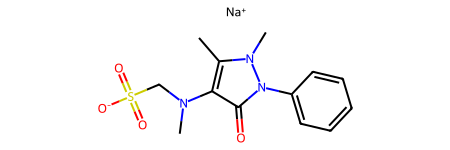

In [34]:
# my fave painkiller
metamisol

In [36]:
metamisol.GetSubstructMatch(benzene)

(8, 9, 10, 11, 12, 13)

In [40]:
match = [mol for mol in data if mol.HasSubstructMatch(metamisol)]
match

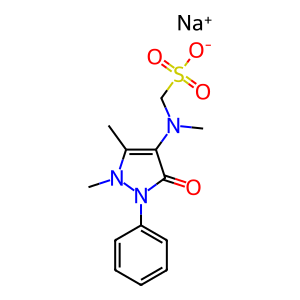

In [48]:
for m in match:
    display(Draw.MolToImage(m))

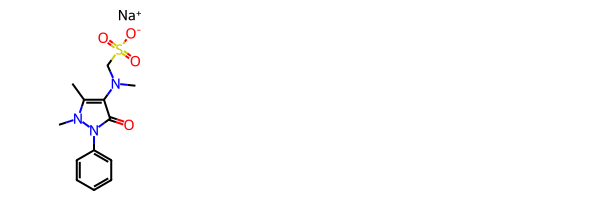

In [52]:
display(Draw.MolsToGridImage(match))  # accepts list of mols but I only have one match

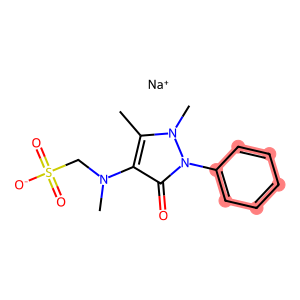

In [58]:
d = rdMolDraw2D.MolDraw2DSVG(300,300)
rdMolDraw2D.PrepareAndDrawMolecule(d, metamisol, highlightAtoms=metamisol.GetSubstructMatch(benzene), highlightBonds=[metamisol.GetBondBetweenAtoms(i, j).GetIdx() for i, j in itertools.combinations(metamisol.GetSubstructMatch(benzene), 2) if metamisol.GetBondBetweenAtoms(i, j)])
d.FinishDrawing()
display(SVG(d.GetDrawingText()))

In [65]:
from itertools import chain
# load PAINS structures in SMARTS format from two files in data
pains = []
with open('../data/pains/p_l15.txt', 'r') as f, open('../data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
pains

[[<rdkit.Chem.rdchem.Mol at 0x7de6f6204a50>, 'anil_di_alk_F(14)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204b30>, 'hzone_anil(14)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6205380>, 'het_5_pyrazole_OH(14)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204ac0>, 'het_thio_666_A(13)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204ba0>, 'styrene_A(13)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204c10>, 'ne_rhod_C(13)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204c80>, 'hp_amino_CN_A(13)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204d60>, 'cyano_imine_C(12)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204cf0>, 'thio_urea_A(12)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204dd0>, 'thiophene_amino_B(12)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204e40>, 'keto_keto_beta_B(12)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204eb0>, 'keto_phenone_A(11)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204f20>, 'cyano_pyridone_C(11)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6204f90>, 'thiaz_ene_C(11)'],
 [<rdkit.Chem.rdchem.Mol at 0x7de6f6205000>, 'hzone_thiophene

In [74]:
# check how many hits for each of PAINS in drugbank ds
found=[]
for p in pains:
    p_mol = p[0]
    p_text = p[1]
    for mol in data:
        if mol.HasSubstructMatch(p_mol):
            found.append((f'{p_text} found in {Chem.MolToSmiles(mol)}'))
found

['styrene_A(13) found in CN(C)CCC=C1c2ccccc2CCc2ccccc21',
 'styrene_A(13) found in CNCCC=C1c2ccccc2CCc2ccccc21',
 'keto_keto_beta_B(12) found in CCCCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O',
 'keto_keto_beta_B(12) found in O=C1C(CCS(=O)c2ccccc2)C(=O)N(c2ccccc2)N1c1ccccc1',
 'keto_keto_beta_B(12) found in CCCCC1C(=O)N(c2ccccc2)N(c2ccc(O)cc2)C1=O',
 'keto_keto_beta_B(12) found in C=CC[C@@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O',
 'keto_keto_beta_B(12) found in CC(=O)CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O',
 'keto_phenone_A(11) found in O=C(O)CCCn1c2c(c3ccccc3c1=O)C(=O)c1ccccc1-2',
 'acyl_het_A(9) found in Cc1cc2c(cc1C)[n+](S(=O)(=O)[O-])c1c(=O)[nH]c(=O)nc-1n2C[C@@H](O)[C@@H](O)[C@H](O)COP(=O)(O)O',
 'acyl_het_A(9) found in Cc1cc2c(cc1C)[n+](C(=O)C(C)C)c1c(=O)[nH]c(=O)nc-1n2C[C@@H](O)[C@@H](O)[C@H](O)CO[P@@](=O)([O-])O[P@](=O)(O)OC[C@@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@H]1O',
 'styrene_B(8) found in CN(C)CCC=C1c2ccccc2Sc2ccc(Cl)cc21',
 'styrene_B(8) found in OCCN1CCN(CC/C=C2/c3ccccc3Sc3ccc(Cl)cc

In [75]:
len(found)

128

In [79]:
import pandas as pd
mtor = pd.read_csv(
    '../data/chembl_mtor_ic50.csv',
    sep=';'
    )

In [80]:
found=[]
for p in pains:
    p_mol = p[0]
    p_text = p[1]
    for mol in mtor["Smiles"].dropna().apply(Chem.MolFromSmiles):
        if mol.HasSubstructMatch(p_mol):
            found.append((f'{p_text} found in {Chem.MolToSmiles(mol)}'))
found

['anil_di_alk_C(246) found in COC[C@H]1OC(=O)/C(=C/N(C)CCCN2CCN(c3ccc(OC)cc3)CC2)C2=C(O)C(=O)C3=C([C@H](OC(C)=O)C[C@]4(C)[C@@H](O)CC[C@@H]34)[C@]21C']

In [81]:
len(found)

1